Name-Shubham Paraye

Email_shubhamparaye5@gmail.com

Task 3-Statastical analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,confusion_matrix,auc

import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option("display.max_columns",30)


In [3]:
data=pd.read_csv('Hospitality minds dataset (1).csv')
data.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,Adults,Children,Kids,Country,Booking Type,Repeated Guest,Prev Cancel,History,Reserved Room,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,2,0.0,0,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,2,0.0,0,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,1,0.0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,3,0.0,0,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,2,0.0,0,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [4]:
data.shape

(90000, 29)

In [5]:
data.describe()

,Year,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Adults,Children,Kids,Repeated Guest,Prev Cancel,History,Booking Changes,Waiting List,Per Day Charges,Parking at premises,Physical Challenged,Cancellation,Booking Done
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,89998.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,2016.168711,27.122456,16.408356,0.908433,2.526967,1.857967,0.104513,0.009667,0.031300,0.058300,0.138289,0.228178,1.306944,101.745815,0.063956,0.623367,0.373722,107.271256
std,0.708918,13.589391,9.083017,1.002316,1.851936,0.525628,0.399714,0.099309,0.174128,0.430933,1.456766,0.658184,13.365843,47.853487,0.245265,0.817632,0.483794,111.192091
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,19.000000
50%,2016.000000,27.000000,17.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000
75%,2017.000000,38.000000,25.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,163.000000
max,2017.000000,53.000000,31.000000,14.000000,35.000000,26.000000,3.000000,2.000000,1.000000,26.000000,66.000000,16.000000,391.000000,437.000000,2.000000,5.000000,1.000000,629.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

# Visualization


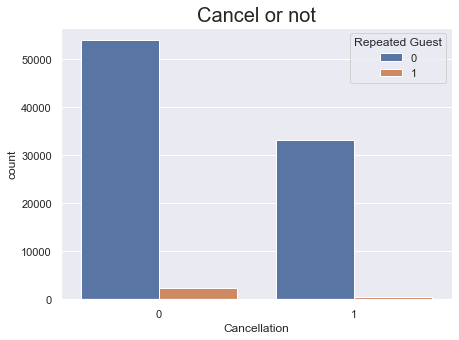

In [7]:
plt.figure(figsize=(7,5))
sns.set(style='darkgrid')
plt.title('Cancel or not',fontdict = {'fontsize': 20})
ax=sns.countplot(x='Cancellation',hue='Repeated Guest',data =data)

There is no surprise that repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

# Boxplot Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

<AxesSubplot:xlabel='Booking Type', ylabel='Weekday Stays'>

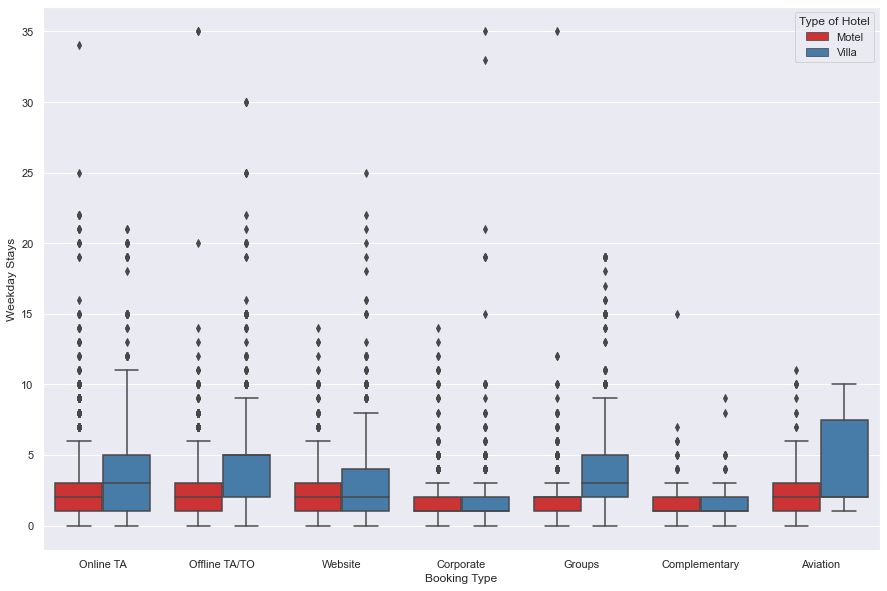

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Booking Type',y='Weekday Stays',data=data,hue='Type of Hotel',palette='Set1')

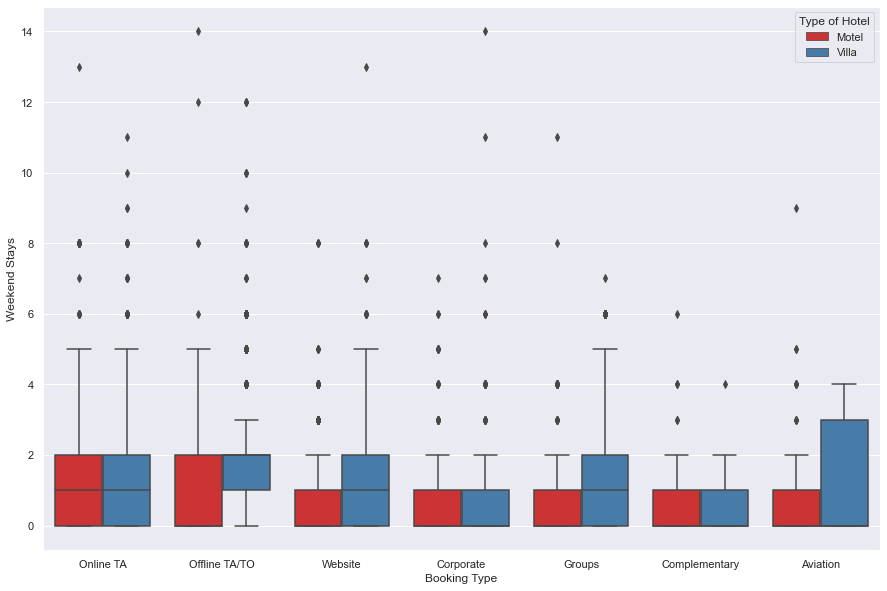

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Booking Type',y='Weekend Stays',hue='Type of Hotel',data=data,palette='Set1');

It can be seen that most of the groups are normal distributed, some of them have high skewness. Looking at the distribution, most people do not seem to prefer to stay at the motel for more than 1 week. But it seems normal to stay in villa  for up to 12-13 days.It is also observed that people book through aviation more likely to stay in Villa.
Apart from that weekday and weekend stay have averagely equal praportion.

# Countplot Distribution of booking type

<AxesSubplot:title={'center':'Countplot distribution of Booking type by Booking Payment'}, xlabel='Booking Type', ylabel='count'>

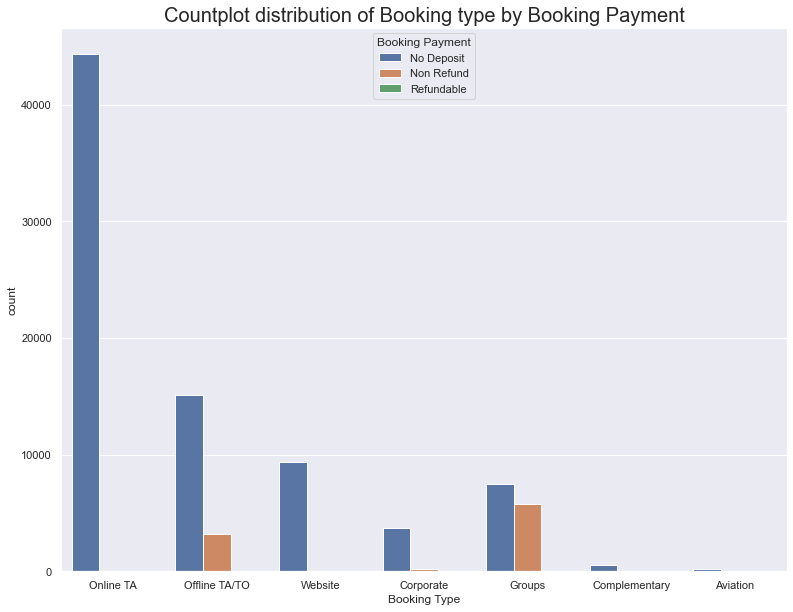

In [10]:
plt.figure(figsize=(13,10))
sns.set(style='darkgrid')
plt.title('Countplot distribution of Booking type by Booking Payment',fontdict = {'fontsize':20})
sns.countplot(x='Booking Type',hue='Booking Payment',data=data)

<AxesSubplot:title={'center':'Countplot disrtibution of booking type bu cancellation'}, xlabel='Booking Type', ylabel='count'>

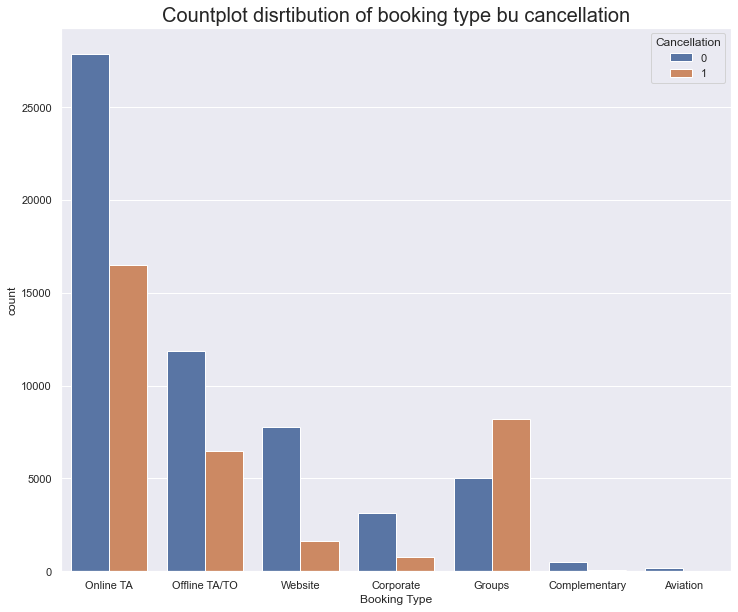

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
plt.title("Countplot disrtibution of booking type bu cancellation",fontdict={"fontsize":20})
sns.countplot(x='Booking Type',hue='Cancellation',data=data)

Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came. It is quite logical to apply a deposit for a large number of customers who will fill important amount of the hotel capacity.

As a first thought, I expected the cancellation rate in the booking type where a deposit is applied to be lower than the other segments where no deposit applied. But when we look at the cancellations according to the segments in the other visualization, it seems that this is not the case.

Groups segment has cancellation rate more than 50%.
Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%.
Direct segment has cancellation rate less than 20%.


# Density Curve of waiting time by Cancellation

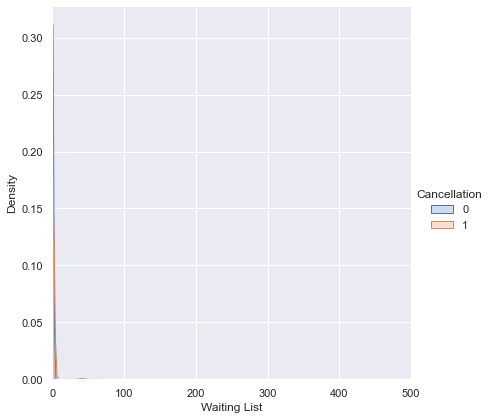

In [12]:
(sns.FacetGrid(data,hue='Cancellation',
              height=6,
              xlim=(0,500))
 .map(sns.kdeplot, 'Waiting List', shade = True)
 .add_legend());

# Monthly Cancellations and Customers by Hotel Types


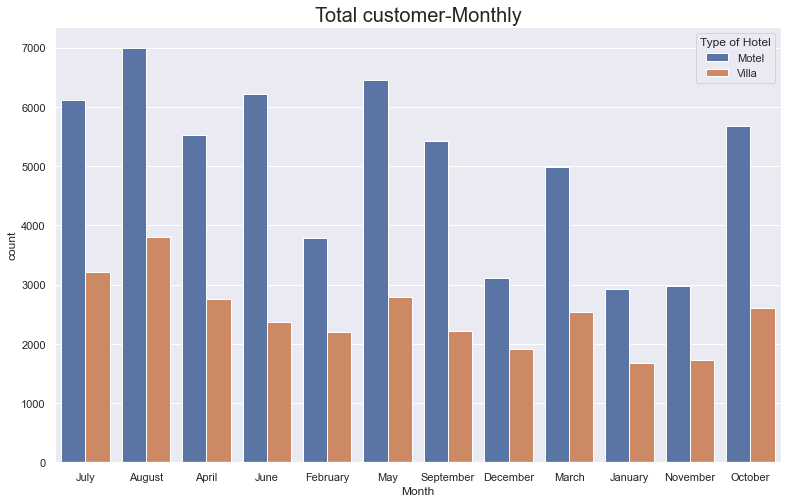

In [13]:
plt.figure(figsize=(13,8))
sns.set(style='darkgrid')
plt.title("Total customer-Monthly",fontdict={'fontsize': 20})
ax=sns.countplot(x='Month',hue='Type of Hotel',data=data)

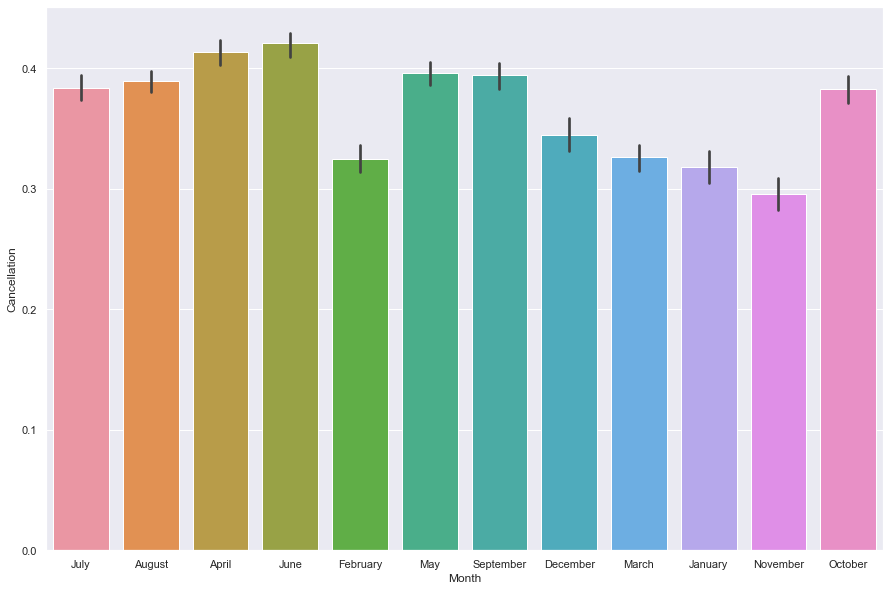

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month',y="Cancellation",data=data);

<AxesSubplot:xlabel='Month', ylabel='Cancellation'>

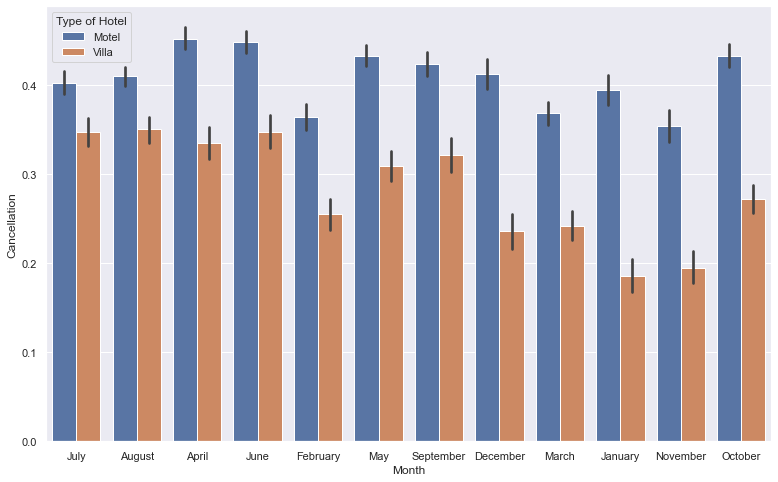

In [15]:
plt.figure(figsize=(13,8))
sns.barplot(x='Month',y="Cancellation",data=data,hue='Type of Hotel')

Looking at the first graph, it can be seen that the motel have more customers in all months. Considering proportionally, resort hotels seem to be a little closer to Motel in summer.

An important interpretation can be made by examining three graphics together. Fewer customers come in the winter months, so when we look at the cancellation rates, it is quite normal that it appears less in the winter months. The point to be noted on these months is that the cancellation rates of motel are almost equal to other months even in winter. The fact that the total cancellation rates of the winter months are low is that the cancellation rates of the villas are low in these months. In short, the possibility of cancellation of villas in winter is very low. This information can be a very important factor when predicting 'is_canceled'.

# Preprocessing


 Missing Values, Feature Engineering and Standardization)


In [16]:
print("# NaN in each column: ", data.isna().sum(), sep='\n')

# NaN in each column: 
Type of Hotel            0
Year                     0
Month                    0
Reservation Date         0
Arrival week             0
Arrival Date             0
Weekend Stays            0
Weekday Stays            0
Meal                     0
Booking Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking Type             0
Repeated Guest           0
Prev Cancel              0
History                  0
Reserved Room            0
Assigned Room            0
Booking Changes          0
Waiting List             0
Customer                 0
Per Day Charges          0
Parking at premises      0
Physical Challenged      0
Reservation Status       0
Cancellation             0
Booking Done             0
dtype: int64


In [17]:
def perc_mv(x,y):
    perc = y.isna().sum()/ len(x) * 100
    return perc

print('Missing value ratios:\nChildren: {}\nCountry: {}'.format(perc_mv(data, data['Children']),
                                                                                   perc_mv(data,data['Country'])))

Missing value ratios:
Children: 0.0022222222222222222
Country: 0.41222222222222227


In [18]:
data['Children']=data['Children'].fillna(0)

# Handling Features

We should check the features to create some more meaningful variables and reduce the number of features if it is possible.

In [19]:
data.dtypes

Type of Hotel           object
Year                     int64
Month                   object
Reservation Date        object
Arrival week             int64
Arrival Date             int64
Weekend Stays            int64
Weekday Stays            int64
Meal                    object
Booking Payment         object
Adults                   int64
Children               float64
Kids                     int64
Country                 object
Booking Type            object
Repeated Guest           int64
Prev Cancel              int64
History                  int64
Reserved Room           object
Assigned Room           object
Booking Changes          int64
Waiting List             int64
Customer                object
Per Day Charges        float64
Parking at premises      int64
Physical Challenged      int64
Reservation Status      object
Cancellation             int64
Booking Done             int64
dtype: object

In [20]:
#I wanted to label them manually. I will do the rest with get.dummies or label_encoder.
data['Type of Hotel']=data['Type of Hotel'].map({"Motel":0, "Villa":1})


In [21]:
data['Month']=data['Month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8, 'September':9, 'October':10, 
                                 'November':11, 'December':12})

In [22]:
def family(data):
    if((data['Adults']>0) & (data['Children']>0)):
        val =1
    elif ((data['Adults']>0) & (data['Kids']>0)):
        val=1
        
    else:
        val=0
    return val

def deposit(data):
    if((data['Booking Payment']=='No Deposit')|(data['Booking Payment']=='Refundable')):
        return 0
    else:
        return 1

In [23]:
def feature(data):
    data['is_family']=data.apply(family,axis=1)
    data['total_Customer']=data['Adults']+data['Children']+data['Kids']
    data['Booking_given']=data.apply(deposit,axis=1)
    data["total_nights"]=data["Weekend Stays"]+ data["Weekday Stays"]
    return data

data=feature(data)

In [24]:
data = data.drop(columns = ['Adults', 'Kids', 'Children', 'Booking Payment', 'Reservation Date'])

In [25]:
data.columns

Index(['Type of Hotel', 'Year', 'Month', 'Arrival week', 'Arrival Date',
       'Weekend Stays', 'Weekday Stays', 'Meal', 'Country', 'Booking Type',
       'Repeated Guest', 'Prev Cancel', 'History', 'Reserved Room',
       'Assigned Room', 'Booking Changes', 'Waiting List', 'Customer',
       'Per Day Charges', 'Parking at premises', 'Physical Challenged',
       'Reservation Status', 'Cancellation', 'Booking Done', 'is_family',
       'total_Customer', 'Booking_given', 'total_nights'],
      dtype='object')

In [26]:
data.dtypes

Type of Hotel            int64
Year                     int64
Month                    int64
Arrival week             int64
Arrival Date             int64
Weekend Stays            int64
Weekday Stays            int64
Meal                    object
Country                 object
Booking Type            object
Repeated Guest           int64
Prev Cancel              int64
History                  int64
Reserved Room           object
Assigned Room           object
Booking Changes          int64
Waiting List             int64
Customer                object
Per Day Charges        float64
Parking at premises      int64
Physical Challenged      int64
Reservation Status      object
Cancellation             int64
Booking Done             int64
is_family                int64
total_Customer         float64
Booking_given            int64
total_nights             int64
dtype: object

In [27]:
cor_data=data.copy()

In [28]:
le = LabelEncoder()

In [29]:
data['Meal']=le.fit_transform(data['Meal'])
data['Booking Type']=le.fit_transform(data['Booking Type'])
data['Reserved Room']=le.fit_transform(data['Reserved Room'])
data['Assigned Room']=le.fit_transform(data['Assigned Room'])
data['Customer']=le.fit_transform(data['Customer'])
data['Reservation Status']=le.fit_transform(data['Reservation Status'])


In [30]:
cor_data.corr()

,Type of Hotel,Year,Month,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Repeated Guest,Prev Cancel,History,Booking Changes,Waiting List,Per Day Charges,Parking at premises,Physical Challenged,Cancellation,Booking Done,is_family,total_Customer,Booking_given,total_nights
Type of Hotel,1.000000,-0.033400,-0.000548,0.000267,-0.002426,0.199440,0.233150,0.056538,-0.032038,0.010500,0.082049,-0.056652,-0.087109,0.215674,0.046334,-0.116331,-0.075719,0.056784,0.025080,-0.167709,0.253885
Year,-0.033400,1.000000,-0.526881,-0.543697,-0.031969,0.017253,0.040925,0.008258,-0.149275,0.031527,0.033918,-0.029101,0.198198,-0.026974,0.103664,0.029818,0.062067,0.046018,0.062209,-0.055485,0.037412
Month,-0.000548,-0.526881,1.000000,0.993953,0.000522,0.016435,0.013650,-0.035511,0.056416,-0.028455,-0.000110,0.015067,0.077464,-0.001433,0.019180,0.008623,0.106786,0.015071,0.031083,0.018976,0.016781
Arrival week,0.000267,-0.543697,0.993953,1.000000,0.086547,0.018383,0.010980,-0.034616,0.055051,-0.027951,0.000737,0.015931,0.071311,0.000497,0.017731,0.005821,0.099915,0.015450,0.028744,0.017173,0.015579
Arrival Date,-0.002426,-0.031969,0.000522,0.086547,1.000000,0.009901,-0.012385,-0.009915,-0.012265,-0.000109,0.007180,-0.001652,0.019633,0.004816,0.006275,0.001626,0.005965,0.013994,0.006310,-0.007976,-0.005230
Weekend Stays,0.199440,0.017253,0.016435,0.018383,0.009901,1.000000,0.473036,-0.070733,-0.026536,-0.041947,0.065323,-0.030223,0.043326,-0.021512,0.067142,-0.009032,0.067996,0.048660,0.090459,-0.119551,0.754946
Weekday Stays,0.233150,0.040925,0.013650,0.010980,-0.012385,0.473036,1.000000,-0.095735,-0.027901,-0.053503,0.086692,-0.004477,0.064688,-0.040809,0.055201,0.037186,0.172460,0.051021,0.109624,-0.075029,0.934893
Repeated Guest,0.056538,0.008258,-0.035511,-0.034616,-0.009915,-0.070733,-0.095735,1.000000,0.137528,0.430953,0.014758,-0.017281,-0.125436,0.071765,0.016153,-0.085175,-0.118747,-0.034799,-0.142294,-0.054284,-0.099754
Prev Cancel,-0.032038,-0.149275,0.056416,0.055051,-0.012265,-0.026536,-0.027901,0.137528,1.000000,0.254315,-0.030213,0.010196,-0.077759,-0.018878,-0.055401,0.127061,0.096493,-0.033759,-0.035341,0.159028,-0.031458
History,0.010500,0.031527,-0.028455,-0.027951,-0.000109,-0.041947,-0.053503,0.430953,0.254315,1.000000,0.008159,-0.008564,-0.079681,0.047550,0.033224,-0.055343,-0.076725,-0.023147,-0.104867,-0.029656,-0.056722


In [31]:
cor_data.corr()["Cancellation"].sort_values()

Physical Challenged   -0.222243
Parking at premises   -0.201436
Booking Changes       -0.121808
Type of Hotel         -0.116331
Repeated Guest        -0.085175
History               -0.055343
is_family             -0.015605
Weekend Stays         -0.009032
Arrival Date           0.001626
Arrival week           0.005821
Month                  0.008623
total_nights           0.024040
Per Day Charges        0.026610
Year                   0.029818
Weekday Stays          0.037186
Waiting List           0.056811
total_Customer         0.058561
Prev Cancel            0.127061
Booking Done           0.298306
Booking_given          0.427766
Cancellation           1.000000
Name: Cancellation, dtype: float64

impacts of three feature that are created:

booking_given = 0.4277

is_family = -0.0156

total_customer = 0.0585

Apart from that, I will not use arrival_date_week_number, stays_in_weekend_nights and arrival_date_day_of_month since their importances are really low while predicting cancellations.



In [32]:
cor_data.corr()['Weekday Stays']

Type of Hotel          0.233150
Year                   0.040925
Month                  0.013650
Arrival week           0.010980
Arrival Date          -0.012385
Weekend Stays          0.473036
Weekday Stays          1.000000
Repeated Guest        -0.095735
Prev Cancel           -0.027901
History               -0.053503
Booking Changes        0.086692
Waiting List          -0.004477
Per Day Charges        0.064688
Parking at premises   -0.040809
Physical Challenged    0.055201
Cancellation           0.037186
Booking Done           0.172460
is_family              0.051021
total_Customer         0.109624
Booking_given         -0.075029
total_nights           0.934893
Name: Weekday Stays, dtype: float64

In [33]:
cor_data = cor_data.drop(columns = ['total_nights', 'Arrival week', 'Weekend Stays', 'Month'], axis = 1)

In [34]:
indices = cor_data.loc[pd.isna(cor_data["Country"]), :].index
cor_data = cor_data.drop(cor_data.index[indices])
cor_data.isnull().sum()

Type of Hotel          0
Year                   0
Arrival Date           0
Weekday Stays          0
Meal                   0
Country                0
Booking Type           0
Repeated Guest         0
Prev Cancel            0
History                0
Reserved Room          0
Assigned Room          0
Booking Changes        0
Waiting List           0
Customer               0
Per Day Charges        0
Parking at premises    0
Physical Challenged    0
Reservation Status     0
Cancellation           0
Booking Done           0
is_family              0
total_Customer         0
Booking_given          0
dtype: int64

In [35]:
indices = data.loc[pd.isna(data["Country"]), :].index 
data = data.drop(data.index[indices])
data = data.drop(columns = ['Arrival week', 'Weekend Stays', 'Month'], axis = 1)

In [36]:
data.columns

Index(['Type of Hotel', 'Year', 'Arrival Date', 'Weekday Stays', 'Meal',
       'Country', 'Booking Type', 'Repeated Guest', 'Prev Cancel', 'History',
       'Reserved Room', 'Assigned Room', 'Booking Changes', 'Waiting List',
       'Customer', 'Per Day Charges', 'Parking at premises',
       'Physical Challenged', 'Reservation Status', 'Cancellation',
       'Booking Done', 'is_family', 'total_Customer', 'Booking_given',
       'total_nights'],
      dtype='object')

In [37]:
#I keep data in case of any changes on features, missing values etc.
df1=data.copy()

In [38]:
df1 = pd.get_dummies(data = df1, columns = ['Meal', 'Booking Type','Reserved Room', 'Assigned Room',
                                            'Customer', 'Reservation Status'])

In [39]:
df1['Country'] = le.fit_transform(df1['Country']) 

In [40]:
df1.head()

,Type of Hotel,Year,Arrival Date,Weekday Stays,Country,Repeated Guest,Prev Cancel,History,Booking Changes,Waiting List,Per Day Charges,Parking at premises,Physical Challenged,Cancellation,Booking Done,...,Assigned Room_3,Assigned Room_4,Assigned Room_5,Assigned Room_6,Assigned Room_7,Assigned Room_8,Assigned Room_9,Assigned Room_10,Customer_0,Customer_1,Customer_2,Customer_3,Reservation Status_0,Reservation Status_1,Reservation Status_2
0,0,2015,28,3,85,0,0,0,0,0,132.0,0,2,0,44,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,2016,25,3,33,0,0,0,1,0,150.0,1,1,0,27,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,2017,21,1,36,0,0,0,0,0,44.0,0,1,0,180,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,2016,27,0,7,0,0,0,0,0,151.0,0,4,0,59,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,2016,20,2,27,0,0,0,0,0,115.0,0,1,0,313,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Decision Tree Model (reservation_status included)

In [41]:
y=df1['Cancellation']
x=df1.drop(['Cancellation'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=42)

In [42]:
cart=DecisionTreeClassifier(max_depth=12)


In [43]:
cart_model=cart.fit(x_train,y_train)

In [44]:
y_pred=cart_model.predict(x_test)

In [45]:
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Accuracy Score: 0.9997024805682622

Confusion Matrix:
 [[16910     2]
 [    6  9971]]

AUC Score: 0.9996401787972318


Text(0.5, 0, 'Feature Importances (%)')

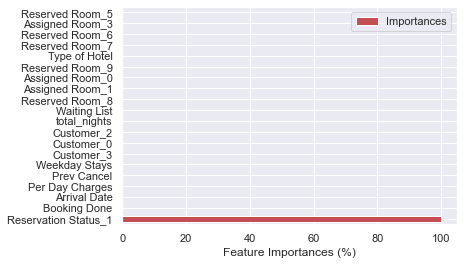

In [46]:
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

 Reservation status dominates other features totally. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations, its like cheating. For the sake of analysis I will drop reservation_status and continue analysis without it.

# Final Arrangements Before Comparing the Models

In [49]:
df2= df1.drop(columns = ['Reservation Status_Canceled,Reservation Status_Check_Out','Reservation Status_No-Show'], axis = 0)

KeyError: "['Reservation Status_Canceled,Reservation Status_Check_Out', 'Reservation Status_No-Show'] not found in axis"

In [48]:
y=df2['Cancellation']
x=df2.drop(['Cancellation'],axiz=1)

x_test,x_train,y_test,y_train=train_test_split(x,y,teat_size=0.30,random_state=42)

NameError: name 'df2' is not defined

In [ ]:
def model(algorithm, x_train, x_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(x_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(x_test)[:,1]
    y_pred = alg_model.predict(x_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    
    
    def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# Model and ROC Curve Comparison

Logistic Regression Model

In [ ]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), x_train, x_test, y_train, y_test)

In [ ]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

In [ ]:
ROC(y_test, y_prob)

# Gaussian Naive Bayes Model

In [ ]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), x_train, x_test, y_train, y_test)

In [ ]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

In [ ]:
ROC(y_test, y_prob)

# Support Vector Classification Model

In [ ]:
#I excluded probability in the function for SVC, also I could not use other kernel methods because it takes really long and I don't think SVC as a good model for this dateset.

print('Model: SVC\n')

def model1(algorithm, x_train, x_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(x_train, x_train)
    global y_pred
    y_pred = alg_model.predict(x_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    
model1(SVC(kernel = 'linear'), x_train, x_test, y_train, y_test)

# Decision Tree Model (reservation_status excluded)

In [ ]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), x_train, x_test, y_train, y_test)

In [ ]:
DTC = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(DTC, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

In [ ]:
ROC(y_test, y_prob)

# Random Forest

In [ ]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), x_train, x_test, y_train, y_test)

In [ ]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

In [ ]:
ROC(y_test, y_prob)

# Random Forest Model Tuning

In [ ]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(x_train, y_train)

In [ ]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, x_train, x_test, y_train, y_test)

# XGBoost Model

In [ ]:
print('Model: XGBoost\n')
model(XGBClassifier(), x_train, x_test, y_train, y_test)

In [ ]:
XGB = XGBClassifier()
cv_scores = cross_val_score(XGB, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

In [ ]:
ROC(y_test, y_prob)

# Neural Network Model

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
rint('Model: Neural Network\n')
model(MLPClassifier(), x_train_scaled, x_test_scaled, y_train, y_test)

In [ ]:
ROC(y_test, y_prob)

# Neural Network Model Tuning

In [ ]:
mlpc_parameters = {"alpha": [1, 0.1, 0.01, 0.001],
                   "hidden_layer_sizes": [(50,50,50),
                                          (100,100)],
                   "solver": ["adam", "sgd"],
                   "activation": ["logistic", "relu"]}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_parameters,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)

mlpc_cv_model.fit(x_train_scaled, y_train)

In [ ]:
print('Best parameters: ' + str(mlpc_cv_model.best_params_))

In [ ]:
lpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')

In [ ]:
rint('Model: Neural Network Tuned\n')
model(mlpc_tuned, x_train_scaled, x_test_scaled, y_train, y_test)

In [ ]:
ROC(y_test, y_prob)

# Conclusion

Feature Importances

In [ ]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(x_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

# Summary Table of the Models

In [ ]:
table = pd.DataFrame({"Model": ["Decision Tree (reservation status included)", "Logistic Regression",
                                "Naive Bayes", "Support Vector", "Decision Tree", "Random Forest",
                                "Random Forest Tuned", "XGBoost", "Neural Network", "Neural Network Tuned"],
                     "Accuracy Scores": ["1", "0.804", "0.582", "0.794", "0.846",
                                         "0.883", "0.851", "0.869", "0.848", "0.859"],
                     "ROC | Auc": ["1", "0.88", "0.78", "0",
                                   "0.92", "0.95", "0", "0.94",
                                   "0.93", "0.94"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")
table["ROC | Auc"] = table["ROC | Auc"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)